In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df = pd.read_csv("train.csv")

In [102]:
df.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [103]:
pd.options.display.max_columns = None
df.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,null,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,null,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,null,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,null,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,null,1120200150,728,90,OtherView,Na,133,7330,277,133,null,2259,null


In [104]:
df2 = df[df["click"] == 1]
df.shape

(2430981, 25)

In [105]:
useragent_df = df["useragent"]

fig, ax = plt.subplots()
useragent_count = df["useragent"].value_counts()
useragent_count.plot(figsize=(18, 16), ax=ax, kind='bar')

useragent_count

os_df = useragent_df
os_df = os_df.apply(lambda x: x.split("_")[0])
os_count = os_df.value_counts()
fig, ax = plt.subplots()
os_count.plot(ax=ax, kind='bar')

In [110]:
dfx = pd.DataFrame(df["advertiser"].value_counts()).sort_index()
dfx

,advertiser
1458,492353
2259,133673
2261,110122
2821,211366
2997,49829
3358,264956
3386,455041
3427,402806
3476,310835


In [107]:
df_ad = df[["payprice","advertiser"]]
df_ad.groupby("advertiser").sum()

,payprice
advertiser,
1458,33968736
2259,12428238
2261,9873779
2821,18828044
2997,3129267
3358,22447231
3386,34931823
3427,30458711
3476,23918779


In [9]:
df_clicked = df[df["click"]==1]

In [10]:
df_clicked[["click", "advertiser"]].groupby("advertiser").count()

,click
advertiser,
1458,385
2259,43
2261,36
2821,131
2997,217
3358,202
3386,320
3427,272
3476,187


In [11]:
df[(df["weekday"]==0) & (df["advertiser"] == 1458)].shape[0]

76372

In [12]:
df[df["advertiser"]==1458]["weekday"].value_counts()

0    76372
5    71634
6    71362
4    69881
3    68874
2    67985
1    66245
Name: weekday, dtype: int64

# WEEKDAY VS CTR

In [13]:
advertiser1 = 3427
ad1_weekday_ctr = pd.DataFrame()
ad1_weekday_ctr["click"] = df[df["advertiser"]==advertiser1].groupby("weekday").sum()["click"]
ad1_weekday_ctr["count"] = df[df["advertiser"]==advertiser1]["weekday"].value_counts()
ad1_weekday_ctr["CTR"] = ad1_weekday_ctr["click"] / ad1_weekday_ctr["count"]
ad1_weekday_ctr["weekday"] = ad1_weekday_ctr.index

In [14]:
ad1_weekday_ctr

,click,count,CTR,weekday
weekday,,,,
0,29,50183,0.000578,0
1,33,54189,0.000609,1
2,43,59341,0.000725,2
3,42,57065,0.000736,3
4,36,59731,0.000603,4
5,40,61296,0.000653,5
6,49,61001,0.000803,6


In [15]:
advertiser2 = 3476
ad2_weekday_ctr = pd.DataFrame()
ad2_weekday_ctr["click"] = df[df["advertiser"]==advertiser2].groupby("weekday").sum()["click"]
ad2_weekday_ctr["count"] = df[df["advertiser"]==advertiser2]["weekday"].value_counts()
ad2_weekday_ctr["CTR"] = ad2_weekday_ctr["click"] / ad2_weekday_ctr["count"]
ad2_weekday_ctr["weekday"] = ad2_weekday_ctr.index

In [16]:
ad2_weekday_ctr

,click,count,CTR,weekday
weekday,,,,
0,32,58445,0.000548,0
1,37,48744,0.000759,1
2,34,47017,0.000723,2
3,20,41886,0.000477,3
4,33,43852,0.000753,4
5,4,14748,0.000271,5
6,27,56143,0.000481,6


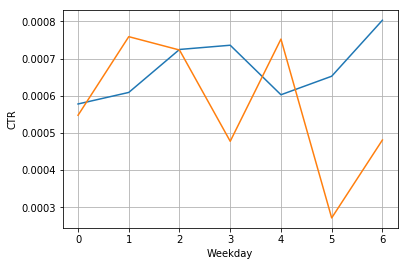

In [17]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('Weekday')
plt.ylabel('CTR')
plt.plot(ad1_weekday_ctr["weekday"], ad1_weekday_ctr["CTR"])
plt.plot(ad2_weekday_ctr["weekday"], ad2_weekday_ctr["CTR"])

# HOUR VS CTR

In [18]:
ad1_hour_ctr = pd.DataFrame()
ad1_hour_ctr["click"] = df[df["advertiser"]==advertiser1].groupby("hour").sum()["click"]
ad1_hour_ctr["count"] = df[df["advertiser"]==advertiser1]["hour"].value_counts()
ad1_hour_ctr["CTR"] = ad1_hour_ctr["click"] / ad1_hour_ctr["count"]
ad1_hour_ctr["hour"] = ad1_hour_ctr.index
ad1_hour_ctr

,click,count,CTR,hour
hour,,,,
0,20,20132,0.000993,0
1,10,14297,0.000699,1
2,2,4488,0.000446,2
3,3,4413,0.000680,3
4,0,1540,0.000000,4
5,1,2665,0.000375,5
6,0,3872,0.000000,6
7,6,11112,0.000540,7
8,5,11632,0.000430,8


In [19]:
ad2_hour_ctr = pd.DataFrame()
ad2_hour_ctr["click"] = df[df["advertiser"]==advertiser2].groupby("hour").sum()["click"]
ad2_hour_ctr["count"] = df[df["advertiser"]==advertiser2]["hour"].value_counts()
ad2_hour_ctr["CTR"] = ad2_hour_ctr["click"] / ad2_hour_ctr["count"]
ad2_hour_ctr["hour"] = ad2_hour_ctr.index
ad2_hour_ctr

,click,count,CTR,hour
hour,,,,
0,5,16869,0.000296,0
1,4,7927,0.000505,1
2,3,6267,0.000479,2
3,2,5990,0.000334,3
4,4,3158,0.001267,4
5,2,3330,0.000601,5
6,0,3992,0.000000,6
7,7,7431,0.000942,7
8,3,11420,0.000263,8


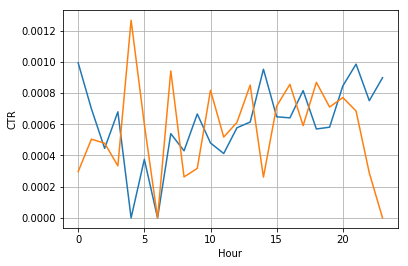

In [20]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('CTR')
plt.plot(ad1_hour_ctr["hour"], ad1_hour_ctr["CTR"])
plt.plot(ad2_hour_ctr["hour"], ad2_hour_ctr["CTR"])

# OS VS CTR

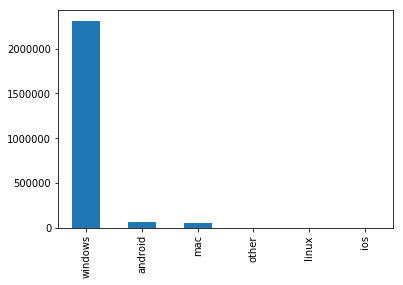

In [21]:
os_df = useragent_df 
os_df = os_df.apply(lambda x: x.split("_")[0]) 
os_count = os_df.value_counts() 
fig, ax = plt.subplots() 
os_count.plot(ax=ax, kind='bar')

In [22]:
df["os"] = df["useragent"].apply(lambda x: x.split("_")[0])
df["browser"] = df["useragent"].apply(lambda x: x.split("_")[1])

In [23]:
ad1_os_ctr = pd.DataFrame()
ad1_os_ctr["click"] = df[df["advertiser"]==advertiser1].groupby("os").sum()["click"]
ad1_os_ctr["count"] = df[df["advertiser"]==advertiser1]["os"].value_counts()
ad1_os_ctr["CTR"] = ad1_os_ctr["click"] / ad1_os_ctr["count"]
ad1_os_ctr["os"] = ad1_os_ctr.index
ad1_os_ctr

,click,count,CTR,os
os,,,,
android,26,2309,0.011260,android
ios,1,44,0.022727,ios
linux,2,252,0.007937,linux
mac,22,7518,0.002926,mac
other,0,197,0.000000,other
windows,221,392486,0.000563,windows


In [24]:
ad2_os_ctr = pd.DataFrame()
ad2_os_ctr["click"] = df[df["advertiser"]==advertiser2].groupby("os").sum()["click"]
ad2_os_ctr["count"] = df[df["advertiser"]==advertiser2]["os"].value_counts()
ad2_os_ctr["CTR"] = ad2_os_ctr["click"] / ad2_os_ctr["count"]
ad2_os_ctr["os"] = ad2_os_ctr.index
ad2_os_ctr

,click,count,CTR,os
os,,,,
android,3,340,0.008824,android
ios,0,23,0.000000,ios
linux,0,225,0.000000,linux
mac,4,2177,0.001837,mac
other,0,53,0.000000,other
windows,180,308017,0.000584,windows


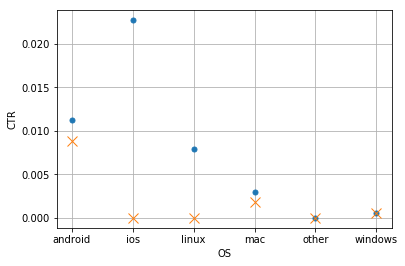

In [25]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('OS')
plt.ylabel('CTR')
plt.plot(ad1_os_ctr["os"], ad1_os_ctr["CTR"], marker='.', linestyle='None', markersize = 10.0)
plt.plot(ad2_os_ctr["os"], ad2_os_ctr["CTR"], marker='x', linestyle='None', markersize = 10.0)

# BROWSER VS CTR

In [26]:
ad1_browser_ctr = pd.DataFrame()
ad1_browser_ctr["click"] = df[df["advertiser"]==advertiser1].groupby("browser").sum()["click"]
ad1_browser_ctr["count"] = df[df["advertiser"]==advertiser1]["browser"].value_counts()
ad1_browser_ctr["CTR"] = ad1_browser_ctr["click"] / ad1_browser_ctr["count"]
ad1_browser_ctr["browser"] = ad1_browser_ctr.index
ad1_browser_ctr

,click,count,CTR,browser
browser,,,,
chrome,54,135584,0.000398,chrome
firefox,2,3821,0.000523,firefox
ie,165,247969,0.000665,ie
maxthon,1,1126,0.000888,maxthon
opera,0,453,0.000000,opera
other,6,3470,0.001729,other
safari,44,7982,0.005512,safari
sogou,0,2,0.000000,sogou
theworld,0,2399,0.000000,theworld


In [27]:
ad2_browser_ctr = pd.DataFrame()
ad2_browser_ctr["click"] = df[df["advertiser"]==advertiser2].groupby("browser").sum()["click"]
ad2_browser_ctr["count"] = df[df["advertiser"]==advertiser2]["browser"].value_counts()
ad2_browser_ctr["CTR"] = ad2_browser_ctr["click"] / ad2_browser_ctr["count"]
ad2_browser_ctr["browser"] = ad2_browser_ctr.index
ad2_browser_ctr

,click,count,CTR,browser
browser,,,,
chrome,53,111057,0.000477,chrome
firefox,1,3921,0.000255,firefox
ie,124,188464,0.000658,ie
maxthon,1,1136,0.000880,maxthon
opera,0,455,0.000000,opera
other,2,1446,0.001383,other
safari,6,2132,0.002814,safari
sogou,0,1,0.000000,sogou
theworld,0,2223,0.000000,theworld


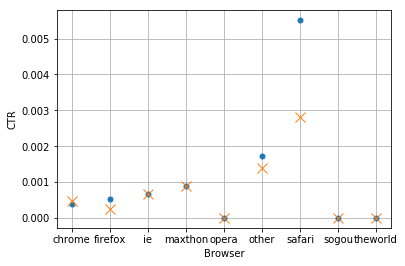

In [28]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('Browser')
plt.ylabel('CTR')
plt.plot(ad1_browser_ctr["browser"], ad1_browser_ctr["CTR"], marker='.', linestyle='None', markersize = 10.0)
plt.plot(ad2_browser_ctr["browser"], ad2_browser_ctr["CTR"], marker='x', linestyle='None', markersize = 10.0)

# REGION VS CTR

In [29]:
ad1_region_ctr = pd.DataFrame()
ad1_region_ctr["click"] = df[df["advertiser"]==advertiser1].groupby("region").sum()["click"]
ad1_region_ctr["count"] = df[df["advertiser"]==advertiser1]["region"].value_counts()
ad1_region_ctr["CTR"] = ad1_region_ctr["click"] / ad1_region_ctr["count"]
ad1_region_ctr["region"] = ad1_region_ctr.index
ad1_region_ctr.sort_values(['region'])
ad1_region_ctr["region"] = ad1_region_ctr["region"].apply(str)
ad1_region_ctr

,click,count,CTR,region
region,,,,
0,6,6487,0.000925,0
1,16,17250,0.000928,1
2,5,6456,0.000774,2
3,20,19814,0.001009,3
15,11,11537,0.000953,15
27,2,5831,0.000343,27
40,5,14832,0.000337,40
55,6,8843,0.000679,55
65,6,9347,0.000642,65


In [30]:
ad2_region_ctr = pd.DataFrame()
ad2_region_ctr["click"] = df[df["advertiser"]==advertiser2].groupby("region").sum()["click"]
ad2_region_ctr["count"] = df[df["advertiser"]==advertiser2]["region"].value_counts()
ad2_region_ctr["CTR"] = ad2_region_ctr["click"] / ad2_region_ctr["count"]
ad2_region_ctr["region"] = ad2_region_ctr.index
ad2_region_ctr.sort_values(['region'])
ad2_region_ctr["region"] = ad2_region_ctr["region"].apply(str)
ad2_region_ctr

,click,count,CTR,region
region,,,,
0,5,5042,0.000992,0
1,15,16512,0.000908,1
2,5,5384,0.000929,2
3,10,13237,0.000755,3
15,7,7643,0.000916,15
27,5,3637,0.001375,27
40,3,11303,0.000265,40
55,3,6534,0.000459,55
65,2,6575,0.000304,65


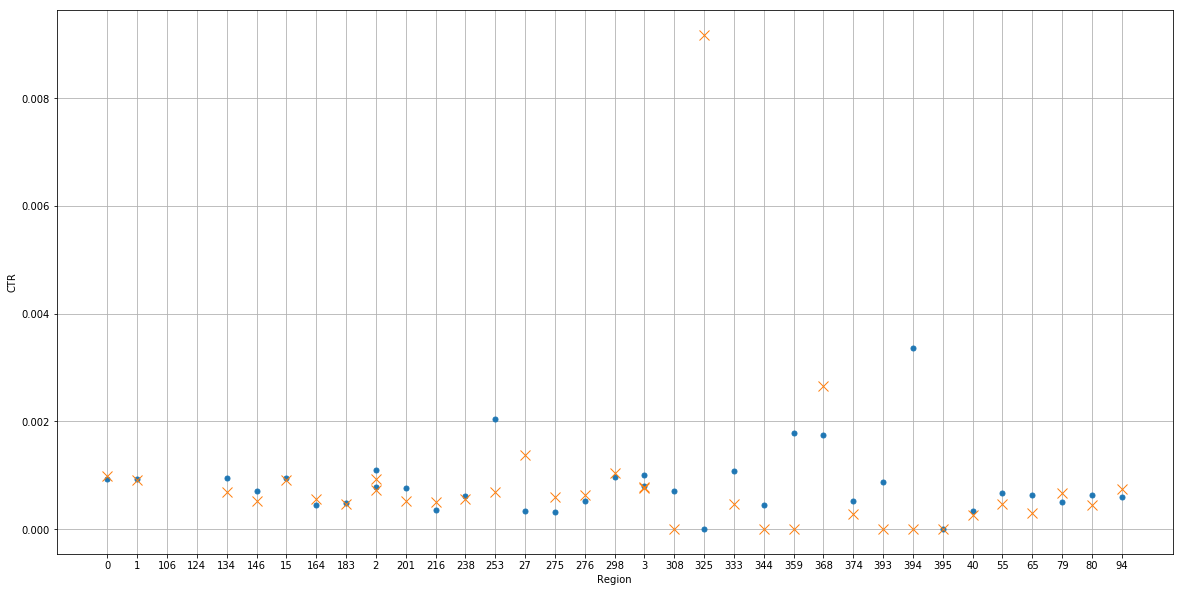

In [31]:
fig, ax = plt.subplots(figsize=(20,10)) 
plt.grid(True)
plt.xlabel('Region')
plt.ylabel('CTR')
plt.plot(ad1_region_ctr["region"], ad1_region_ctr["CTR"], marker='.', linestyle='None', markersize = 10.0)
plt.plot(ad2_region_ctr["region"], ad2_region_ctr["CTR"], marker='x', linestyle='None', markersize = 10.0)

# AD EXCHANGE VS CTR

In [33]:
ad1_exchange_ctr = pd.DataFrame()
ad1_exchange_ctr["click"] = df[df["advertiser"]==advertiser1].groupby("adexchange").sum()["click"]
ad1_exchange_ctr["count"] = df[df["advertiser"]==advertiser1]["adexchange"].value_counts()
ad1_exchange_ctr["CTR"] = ad1_exchange_ctr["click"] / ad1_exchange_ctr["count"]
ad1_exchange_ctr["adexchange"] = ad1_exchange_ctr.index
ad1_exchange_ctr.sort_values(['adexchange'])
ad1_exchange_ctr["adexchange"] = ad1_exchange_ctr["adexchange"].apply(str)
ad1_exchange_ctr

,click,count,CTR,adexchange
adexchange,,,,
1,100,102070,0.000980,1
2,73,142802,0.000511,2
3,99,157934,0.000627,3


In [34]:
ad2_exchange_ctr = pd.DataFrame()
ad2_exchange_ctr["click"] = df[df["advertiser"]==advertiser2].groupby("adexchange").sum()["click"]
ad2_exchange_ctr["count"] = df[df["advertiser"]==advertiser2]["adexchange"].value_counts()
ad2_exchange_ctr["CTR"] = ad2_exchange_ctr["click"] / ad2_exchange_ctr["count"]
ad2_exchange_ctr["adexchange"] = ad2_exchange_ctr.index
ad2_exchange_ctr.sort_values(['adexchange'])
ad2_exchange_ctr["adexchange"] = ad2_exchange_ctr["adexchange"].apply(str)
ad2_exchange_ctr

,click,count,CTR,adexchange
adexchange,,,,
1,50,86343,0.000579,1
2,34,105647,0.000322,2
3,103,118845,0.000867,3


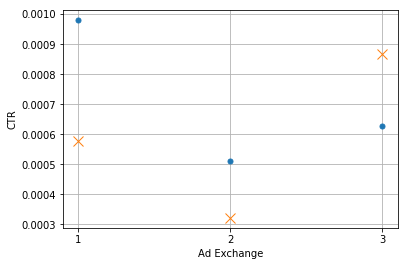

In [37]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('Ad Exchange')
plt.ylabel('CTR')
plt.plot(ad1_exchange_ctr["adexchange"], ad1_exchange_ctr["CTR"], marker='.', linestyle='None', markersize = 10.0)
plt.plot(ad2_exchange_ctr["adexchange"], ad2_exchange_ctr["CTR"], marker='x', linestyle='None', markersize = 10.0)

# PRICE VS WEEKDAY

In [38]:
ad1_weekday_price = pd.DataFrame()
ad1_weekday_price["payprice"] = df[df["advertiser"]==advertiser1].groupby("weekday").mean()["payprice"]
ad1_weekday_price["weekday"] = ad1_weekday_price.index
ad1_weekday_price

,payprice,weekday
weekday,,
0,68.844290,0
1,78.284744,1
2,77.504929,2
3,77.281661,3
4,77.691550,4
5,77.412882,5
6,71.584630,6


In [39]:
ad2_weekday_price = pd.DataFrame()
ad2_weekday_price["payprice"] = df[df["advertiser"]==advertiser2].groupby("weekday").mean()["payprice"]
ad2_weekday_price["weekday"] = ad2_weekday_price.index
ad2_weekday_price

,payprice,weekday
weekday,,
0,76.454855,0
1,79.412030,1
2,80.532807,2
3,75.615241,3
4,74.707927,4
5,71.602319,5
6,76.479721,6


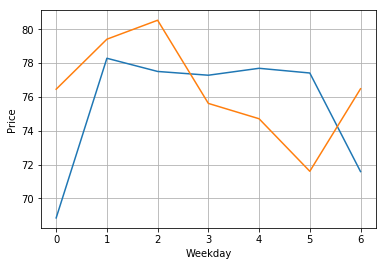

In [40]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('Weekday')
plt.ylabel('Price')
plt.plot(ad1_weekday_price["weekday"], ad1_weekday_price["payprice"])
plt.plot(ad2_weekday_price["weekday"], ad2_weekday_price["payprice"])

# HOUR VS PRICE

In [42]:
ad1_hour_price = pd.DataFrame()
ad1_hour_price["payprice"] = df[df["advertiser"]==advertiser1].groupby("hour").mean()["payprice"]
ad1_hour_price["hour"] = ad1_hour_price.index
ad1_hour_price.head()

,payprice,hour
hour,,
0,79.782039,0
1,74.756802,1
2,65.224599,2
3,70.196012,3
4,67.692208,4


In [43]:
ad2_hour_price = pd.DataFrame()
ad2_hour_price["payprice"] = df[df["advertiser"]==advertiser2].groupby("hour").mean()["payprice"]
ad2_hour_price["hour"] = ad2_hour_price.index
ad2_hour_price.head()

,payprice,hour
hour,,
0,76.954828,0
1,71.522770,1
2,69.301261,2
3,70.442404,3
4,71.639329,4


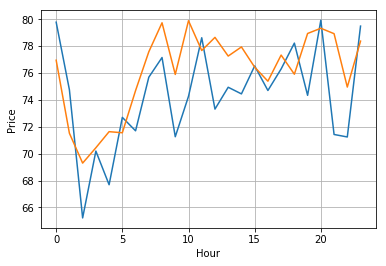

In [45]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Price')
plt.plot(ad1_hour_price["hour"], ad1_hour_price["payprice"])
plt.plot(ad2_hour_price["hour"], ad2_hour_price["payprice"])

# OS VS PRICE

In [46]:
ad1_os_price = pd.DataFrame()
ad1_os_price["payprice"] = df[df["advertiser"]==advertiser1].groupby("os").mean()["payprice"]
ad1_os_price["os"] = ad1_os_price.index
ad1_os_price.head()

,payprice,os
os,,
android,93.779125,android
ios,81.977273,ios
linux,78.138889,linux
mac,77.245411,mac
other,86.776650,other


In [50]:
ad2_os_price = pd.DataFrame()
ad2_os_price["payprice"] = df[df["advertiser"]==advertiser2].groupby("os").mean()["payprice"]
ad2_os_price["os"] = ad2_os_price.index
ad2_os_price.head()

,payprice,os
os,,
android,78.070588,android
ios,72.347826,ios
linux,83.248889,linux
mac,74.733119,mac
other,75.150943,other


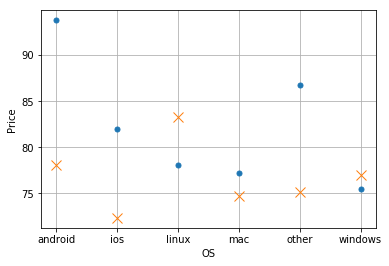

In [49]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('OS')
plt.ylabel('Price')
plt.plot(ad1_os_price["os"], ad1_os_price["payprice"], marker='.', linestyle='None', markersize = 10.0)
plt.plot(ad2_os_price["os"], ad2_os_price["payprice"], marker='x', linestyle='None', markersize = 10.0)

# BROWSER VS PRICE

In [51]:
ad1_browser_price = pd.DataFrame()
ad1_browser_price["payprice"] = df[df["advertiser"]==advertiser1].groupby("browser").mean()["payprice"]
ad1_browser_price["browser"] = ad1_browser_price.index
ad1_browser_price.head()

,payprice,os
browser,,
chrome,76.118303,chrome
firefox,66.609003,firefox
ie,75.307885,ie
maxthon,71.957371,maxthon
opera,69.697572,opera


In [52]:
ad2_browser_price = pd.DataFrame()
ad2_browser_price["payprice"] = df[df["advertiser"]==advertiser2].groupby("browser").mean()["payprice"]
ad2_browser_price["browser"] = ad2_browser_price.index
ad2_browser_price.head()

,payprice,os
browser,,
chrome,77.349748,chrome
firefox,73.951288,firefox
ie,76.876364,ie
maxthon,76.065141,maxthon
opera,68.637363,opera


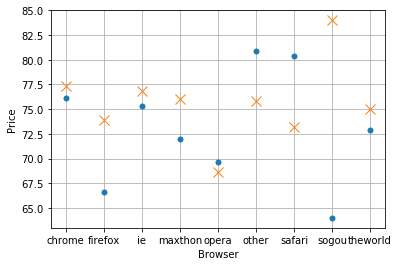

In [53]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('Browser')
plt.ylabel('Price')
plt.plot(ad1_browser_price["browser"], ad1_browser_price["payprice"], marker='.', linestyle='None', markersize = 10.0)
plt.plot(ad2_browser_price["browser"], ad2_browser_price["payprice"], marker='x', linestyle='None', markersize = 10.0)

# REGION VS PRICE

In [59]:
ad1_region_price = pd.DataFrame()
ad1_region_price["payprice"] = df[df["advertiser"]==advertiser1].groupby("region").mean()["payprice"]
ad1_region_price["region"] = ad1_region_price.index
ad1_region_price.sort_values(['region'])
ad1_region_price["region"] = ad1_region_price["region"].apply(str)
ad1_region_price.head()

,payprice,region
region,,
0,70.176661,0
1,76.069797,1
2,78.720570,2
3,78.321137,3
15,77.811649,15


In [60]:
ad2_region_price = pd.DataFrame()
ad2_region_price["payprice"] = df[df["advertiser"]==advertiser2].groupby("region").mean()["payprice"]
ad2_region_price["region"] = ad2_region_price.index
ad2_region_price.sort_values(['region'])
ad2_region_price["region"] = ad2_region_price["region"].apply(str)
ad2_region_price.head()

,payprice,region
region,,
0,67.082507,0
1,82.426599,1
2,79.111813,2
3,78.569011,3
15,79.484888,15


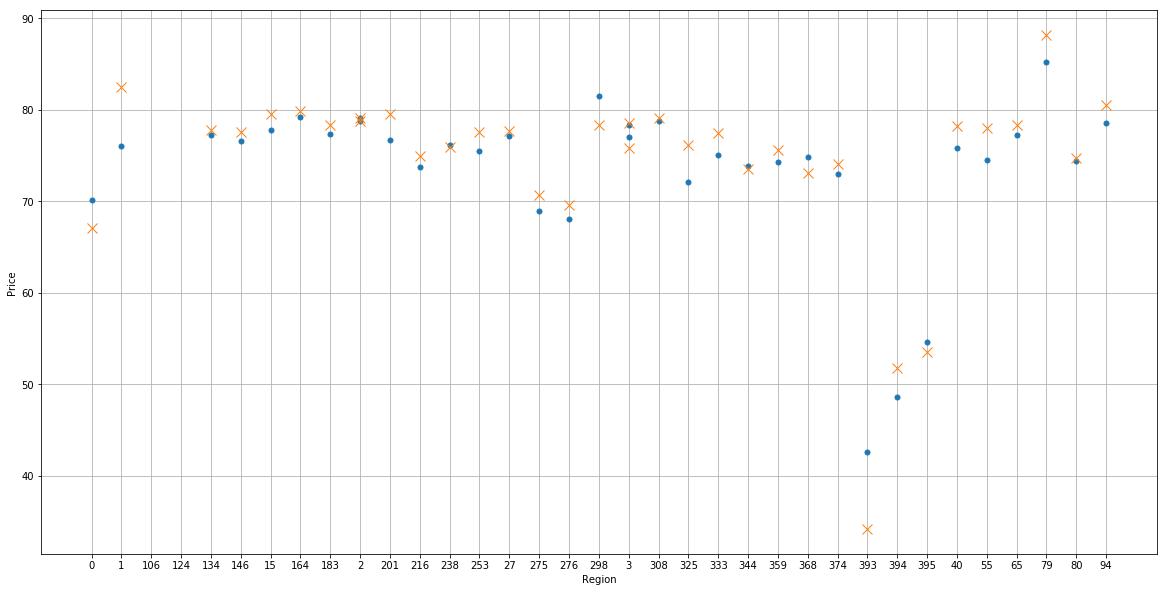

In [61]:
fig, ax = plt.subplots(figsize=(20,10)) 
plt.grid(True)
plt.xlabel('Region')
plt.ylabel('Price')
plt.plot(ad1_region_price["region"], ad1_region_price["payprice"], marker='.', linestyle='None', markersize = 10.0)
plt.plot(ad2_region_price["region"], ad2_region_price["payprice"], marker='x', linestyle='None', markersize = 10.0)

# AD EXCHANGE VS PRICE

In [62]:
ad1_exchange_price = pd.DataFrame()
ad1_exchange_price["payprice"] = df[df["advertiser"]==advertiser1].groupby("adexchange").mean()["payprice"]
ad1_exchange_price["exchange"] = ad1_exchange_price.index
ad1_exchange_price.sort_values(['exchange'])
ad1_exchange_price["exchange"] = ad1_exchange_price["exchange"].apply(str)
ad1_exchange_price.head()

,payprice,exchange
adexchange,,
1,91.263956,1
2,74.131714,2
3,66.845910,3


In [63]:
ad2_exchange_price = pd.DataFrame()
ad2_exchange_price["payprice"] = df[df["advertiser"]==advertiser2].groupby("adexchange").mean()["payprice"]
ad2_exchange_price["exchange"] = ad2_exchange_price.index
ad2_exchange_price.sort_values(['exchange'])
ad2_exchange_price["exchange"] = ad2_exchange_price["exchange"].apply(str)
ad2_exchange_price.head()

,payprice,exchange
adexchange,,
1,91.860521,1
2,70.413831,2
3,71.927771,3


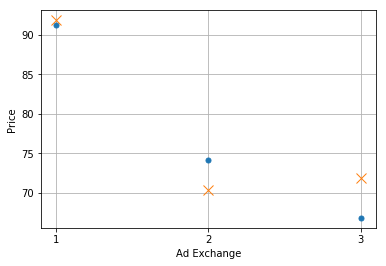

In [65]:
fig, ax = plt.subplots() 
plt.grid(True)
plt.xlabel('Ad Exchange')
plt.ylabel('Price')
plt.plot(ad1_exchange_price["exchange"], ad1_exchange_price["payprice"], marker='.', linestyle='None', markersize = 10.0)
plt.plot(ad2_exchange_price["exchange"], ad2_exchange_price["payprice"], marker='x', linestyle='None', markersize = 10.0)

# WEEKDAY VS ECPC

In [74]:
ad1_weekday_ecpc = pd.DataFrame()
ad1_weekday_ecpc["cost"] = df[df["advertiser"]==advertiser2].groupby("weekday").sum()["payprice"]
ad1_weekday_ecpc["clicks"] = df[df["advertiser"]==advertiser2].groupby("weekday").sum()["click"]
ad1_weekday_ecpc["ecpc"] = (ad1_weekday_ecpc["cost"] / 1000) / ad1_weekday_ecpc["clicks"]
ad1_weekday_ecpc["weekday"] = ad1_weekday_price.index
ad1_weekday_ecpc

,cost,clicks,ecpc,weekday
weekday,,,,
0,4468404,32,139.637625,0
1,3870860,37,104.617838,1
2,3786411,34,111.365029,2
3,3167220,20,158.361000,3
4,3276092,33,99.275515,4
5,1055991,4,263.997750,5
6,4293801,27,159.029667,6


<Container object of 7 artists>

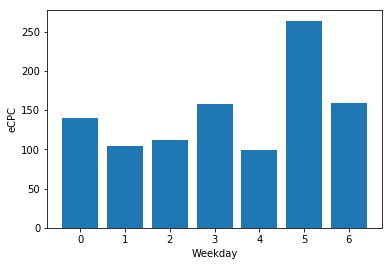

In [75]:
fig, ax = plt.subplots() 
# plt.grid(True)
plt.xlabel('Weekday')
plt.ylabel('eCPC')
plt.bar(ad1_weekday_ecpc["weekday"], ad1_weekday_ecpc["ecpc"])

# HOUR VS ECPC

In [76]:
ad1_hour_ecpc = pd.DataFrame()
ad1_hour_ecpc["cost"] = df[df["advertiser"]==advertiser2].groupby("hour").sum()["payprice"]
ad1_hour_ecpc["clicks"] = df[df["advertiser"]==advertiser2].groupby("hour").sum()["click"]
ad1_hour_ecpc["ecpc"] = (ad1_hour_ecpc["cost"] / 1000) / ad1_hour_ecpc["clicks"]
ad1_hour_ecpc["hour"] = ad1_hour_price.index
ad1_hour_ecpc.head()

,cost,clicks,ecpc,hour
hour,,,,
0,1298151,5,259.630200,0
1,566961,4,141.740250,1
2,434311,3,144.770333,2
3,421950,2,210.975000,3
4,226237,4,56.559250,4


<Container object of 24 artists>

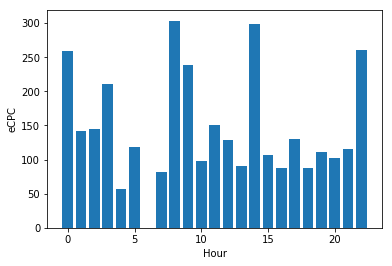

In [77]:
fig, ax = plt.subplots() 
# plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('eCPC')
plt.bar(ad1_hour_ecpc["hour"], ad1_hour_ecpc["ecpc"])

# OS VS ECPC

In [79]:
ad2_os_ecpc = pd.DataFrame()
ad2_os_ecpc["click"] = df[df["advertiser"]==advertiser2].groupby("os").sum()["click"]
ad2_os_ecpc["cost"] = df[df["advertiser"]==advertiser2].groupby("os").sum()["payprice"]
ad2_os_ecpc["ecpc"] = (ad2_os_ecpc["cost"] / 1000) / ad2_os_ecpc["click"]
ad2_os_ecpc["os"] = ad2_os_ecpc.index
ad2_os_ecpc

,click,cost,ecpc,os
os,,,,
android,3,26544,8.848000,android
ios,0,1664,inf,ios
linux,0,18731,inf,linux
mac,4,162694,40.673500,mac
other,0,3983,inf,other
windows,180,23705163,131.695350,windows


<Container object of 6 artists>

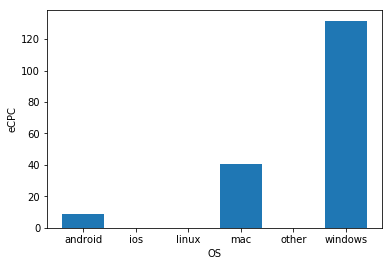

In [81]:
fig, ax = plt.subplots() 
# plt.grid(True)
plt.xlabel('OS')
plt.ylabel('eCPC')
plt.bar(ad2_os_ecpc["os"], ad2_os_ecpc["ecpc"])

# BROWSER VS ECPC

In [83]:
ad2_browser_ecpc = pd.DataFrame()
ad2_browser_ecpc["click"] = df[df["advertiser"]==advertiser2].groupby("browser").sum()["click"]
ad2_browser_ecpc["cost"] = df[df["advertiser"]==advertiser2].groupby("browser").sum()["payprice"]
ad2_browser_ecpc["ecpc"] = (ad2_browser_ecpc["cost"] / 1000) / ad2_browser_ecpc["click"]
ad2_browser_ecpc["browser"] = ad2_browser_ecpc.index
ad2_browser_ecpc

,click,cost,ecpc,browser
browser,,,,
chrome,53,8590231,162.079830,chrome
firefox,1,289963,289.963000,firefox
ie,124,14488427,116.842153,ie
maxthon,1,86410,86.410000,maxthon
opera,0,31230,inf,opera
other,2,109714,54.857000,other
safari,6,155998,25.999667,safari
sogou,0,84,inf,sogou
theworld,0,166722,inf,theworld


<Container object of 9 artists>

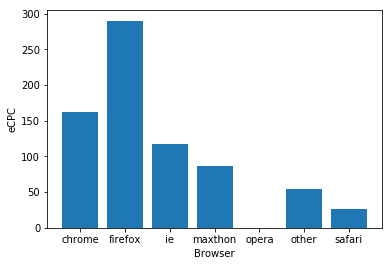

In [84]:
fig, ax = plt.subplots() 
# plt.grid(True)
plt.xlabel('Browser')
plt.ylabel('eCPC')
plt.bar(ad2_browser_ecpc["browser"], ad2_browser_ecpc["ecpc"])

# REGION VS ECPC

In [95]:
ad2_region_ecpc = pd.DataFrame()
ad2_region_ecpc["click"] = df[df["advertiser"]==advertiser2].groupby("region").sum()["click"]
ad2_region_ecpc["cost"] = df[df["advertiser"]==advertiser2].groupby("region").sum()["payprice"]
ad2_region_ecpc["ecpc"] = (ad2_region_ecpc["cost"] / 1000) / ad2_region_ecpc["click"]
ad2_region_ecpc["region"] = ad2_region_ecpc.index
ad2_region_ecpc.sort_values(['region'])
ad2_region_ecpc["region"] = ad2_region_ecpc["region"].apply(str)
ad2_region_ecpc.head()

,click,cost,ecpc,region
region,,,,
0,5,338230,67.646000,0
1,15,1361028,90.735200,1
2,5,425938,85.187600,2
3,10,1040018,104.001800,3
15,7,607503,86.786143,15


<Container object of 35 artists>

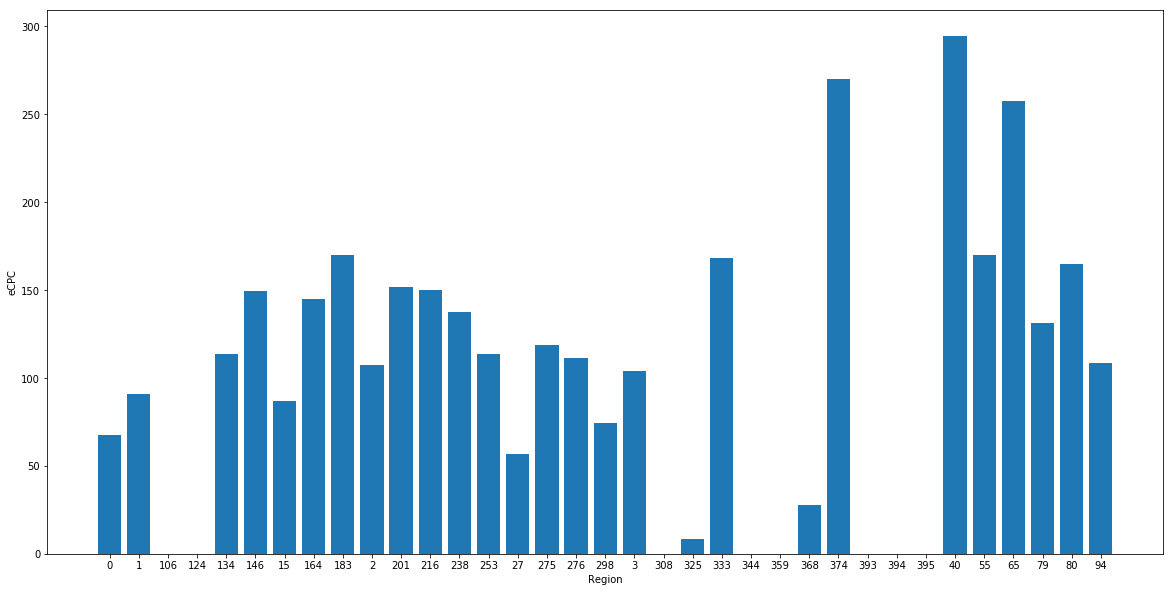

In [96]:
fig, ax = plt.subplots(figsize=(20,10)) 
# plt.grid(True)
plt.xlabel('Region')
plt.ylabel('eCPC')
plt.bar(ad2_region_ecpc["region"], ad2_region_ecpc["ecpc"])

# AD EXCHANGE VS ECPC

In [97]:
ad2_adexchange_ecpc = pd.DataFrame()
ad2_adexchange_ecpc["click"] = df[df["advertiser"]==advertiser2].groupby("adexchange").sum()["click"]
ad2_adexchange_ecpc["cost"] = df[df["advertiser"]==advertiser2].groupby("adexchange").sum()["payprice"]
ad2_adexchange_ecpc["ecpc"] = (ad2_adexchange_ecpc["cost"] / 1000) / ad2_adexchange_ecpc["click"]
ad2_adexchange_ecpc["adexchange"] = ad2_adexchange_ecpc.index
ad2_adexchange_ecpc.sort_values(['adexchange'])
ad2_adexchange_ecpc["adexchange"] = ad2_adexchange_ecpc["adexchange"].apply(str)
ad2_adexchange_ecpc.head()

,click,cost,ecpc,adexchange
adexchange,,,,
1,50,7931513,158.630260,1
2,34,7439010,218.794412,2
3,103,8548256,82.992777,3


<Container object of 3 artists>

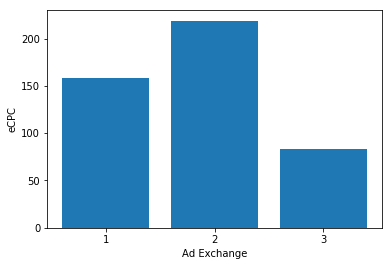

In [98]:
fig, ax = plt.subplots() 
# plt.grid(True)
plt.xlabel('Ad Exchange')
plt.ylabel('eCPC')
plt.bar(ad2_adexchange_ecpc["adexchange"], ad2_adexchange_ecpc["ecpc"])